# Доверительные интервалы для доли 

## Генерация данных

In [1]:
import numpy as np

In [2]:
np.random.seed(1)

statistical_population = np.random.randint(2, size = 100000) 

random_sample = np.random.choice(statistical_population, size = 1000)

In [3]:
#истинное значение доли
statistical_population.mean()

0.49771

## Точечная оценка доли

In [4]:
random_sample.mean()

0.502

## Доверительный интервал для доли

In [5]:
from statsmodels.stats.proportion import proportion_confint

/Users/zander/miniconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/zander/miniconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


### Доверительный интервал на основе нормального распределения

$$\hat{p}\pm z_{1-\frac{\alpha}{2}} \sqrt{\frac{\hat{p}\left(1-\hat{p}\right)}{n}}$$

In [6]:
normal_interval = proportion_confint(sum(random_sample), len(random_sample), method = 'normal')

In [7]:
print('normal_interval [%f, %f] with width %f' % (normal_interval[0],
                                                  normal_interval[1], 
                                                  normal_interval[1] - normal_interval[0]))

normal_interval [0.471010, 0.532990] with width 0.061979


### Доверительный интервал Уилсона

$$\frac1{ 1 + \frac{z^2}{n} } \left( \hat{p} + \frac{z^2}{2n} \pm z \sqrt{ \frac{ \hat{p}\left(1-\hat{p}\right)}{n} + \frac{
z^2}{4n^2} } \right), \;\; z \equiv z_{1-\frac{\alpha}{2}}$$ 

In [8]:
wilson_interval = proportion_confint(sum(random_sample), len(random_sample), method = 'wilson')

In [9]:
print('wilson_interval [%f, %f] with width %f' % (wilson_interval[0],
                                                  wilson_interval[1],
                                                  wilson_interval[1] - wilson_interval[0]))

wilson_interval [0.471062, 0.532922] with width 0.061860


## Размер выборки для интервала заданной ширины

In [10]:
from statsmodels.stats.proportion import samplesize_confint_proportion

In [11]:
n_samples = int(np.ceil(samplesize_confint_proportion(random_sample.mean(), 0.01)))
n_samples

9604

In [12]:
np.random.seed(1)
random_sample = np.random.choice(statistical_population, size = n_samples)

In [13]:
normal_interval = proportion_confint(sum(random_sample), len(random_sample), method = 'normal')

In [14]:
print('normal_interval [%f, %f] with width %f' % (normal_interval[0],
                                                  normal_interval[1],
                                                  normal_interval[1] - normal_interval[0]))

normal_interval [0.481776, 0.501773] with width 0.019997


In [15]:
import statistics as st

In [41]:
proportion_confint(1, 50, method = 'wilson')

(0.003539259271646236, 0.10495443589637815)

In [18]:
import scipy.stats as st

In [21]:
st.norm.ppf(((1+0.95)/2.)*(0.02*(1-0.02)/59)**0.5)

-2.102133618415674

In [33]:
a = np.zeros((50, ))
a[11] = 1.0
mean = a.mean()
std = a.std(ddof=1)

In [29]:
np.random.randint(0, 51)

11

In [34]:
st.norm.ppf(0.05, mean, std)

-0.2126174307353348

In [37]:
p = 1/50
n = 50

In [40]:
p - 1.96*np.sqrt(p*(1-p)/n)

-0.018806020151517725

In [42]:
n_samples = int(np.ceil(samplesize_confint_proportion(mean, 0.01)))
n_samples

753

In [49]:
means = np.arange(0,1.02,0.02)

In [51]:
nsamples = [int(np.ceil(samplesize_confint_proportion(mean, 0.01))) for mean in means]

In [52]:
import matplotlib.pyplot as plt  

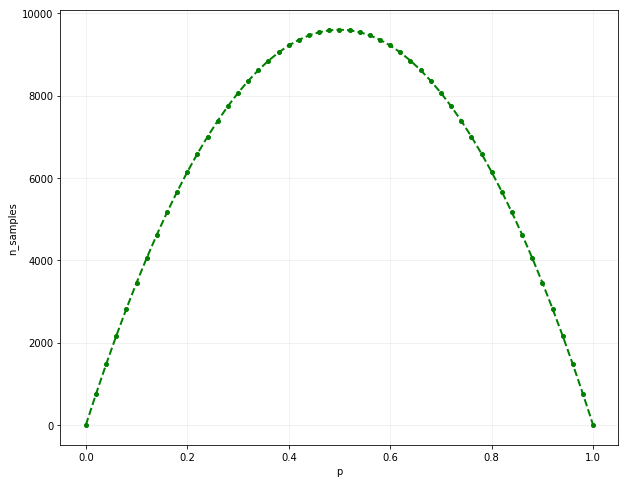

In [56]:
plt.figure(figsize=(10,8))
plt.plot(means, nsamples, color='green', marker='o', linestyle='dashed',
        linewidth=2, markersize=4)
plt.xlabel('p')
plt.ylabel('n_samples')
plt.grid(alpha=0.2)

In [57]:
max(nsamples)

9604